## Linear Regression

Author :Nutan Mandale

Mentor: Vincent Ramdhanie

In [1]:
#importing libraries
%matplotlib inline
from IPython.display import display
import numpy as np
import pandas as pd
import scipy
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# import data
data = pd.read_excel("./Table_8_Offenses_Known_to_Law_Enforcement_by_New_York_by_City_2014.xls")

In [3]:
data.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2014",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1851,0,0,NaN,0,0,0,11,1,10,0,0


### Data Cleaning

In [4]:
data.drop(data.index[0:4], inplace=True)
data.drop(data.index[-3:], inplace=True)

In [5]:
data = data.rename(columns = {'Table 8':'City','Unnamed: 1':'Population','Unnamed: 2':'Violentcrime','Unnamed: 3':'Murder','Unnamed: 4':'Rape1','Unnamed: 5':'Rape','Unnamed: 6':'Robbery','Unnamed: 7':'Aggravatedassault','Unnamed: 8':'Propertycrime','Unnamed: 9':'Burglary','Unnamed: 10':'Larcenythef','Unnamed: 11':'Motorvehicletheft','Unnamed: 12':'Arson3'})

In [6]:
data['Robbery_F'] = data['Robbery'].map(lambda x: 1 if x > 0 else 0)
data['Murder_F'] = data['Murder'].map(lambda x: 1 if x > 0 else 0)
data['Burglary_F'] = data['Burglary'].map(lambda x: 1 if x > 0 else 0)
data['Larcenythef_F'] = data['Larcenythef'].map(lambda x: 1 if x > 0 else 0)
data['Motorvehicletheft_F'] = data['Motorvehicletheft'].map(lambda x: 1 if x > 0 else 0)
data['pop_square'] = data['Population'].map(lambda x: x*x)

In [7]:
data.head(2)

,City,Population,Violentcrime,Murder,Rape1,Rape,Robbery,Aggravatedassault,Propertycrime,Burglary,Larcenythef,Motorvehicletheft,Arson3,Robbery_F,Murder_F,Burglary_F,Larcenythef_F,Motorvehicletheft_F,pop_square
4,Adams Village,1851,0,0,NaN,0,0,0,11,1,10,0,0,0,0,1,1,0,3426201.0
5,Addison Town and Village,2568,2,0,NaN,0,1,1,49,1,47,1,0,1,0,1,1,1,6594624.0


In [8]:
data.dropna()

,City,Population,Violentcrime,Murder,Rape1,Rape,Robbery,Aggravatedassault,Propertycrime,Burglary,Larcenythef,Motorvehicletheft,Arson3,Robbery_F,Murder_F,Burglary_F,Larcenythef_F,Motorvehicletheft_F,pop_square


In [9]:
data.shape

(373, 19)

### Multivariable_regression

In order to predict the property crime in 2013 we used the following model.

$Propertycrime = α + Population + Population^2 + Murder +Robbery$

We transformed certain parts of the model and got the following equation.

$$\sqrt{Propertycrime} = \alpha + \beta_1Populationlog+ \beta_2\sqrt{Robbery} + \beta_3\sqrt{Burglary} + \beta_4\sqrt{Murder} + \beta_5\sqrt{Larcenythef} + \beta_6\sqrt{Motorvehicletheft}$$

In [10]:
data_new1 = data[['City','Population', 'Murder_F', 'Robbery_F', 'Propertycrime','Burglary_F','Larcenythef_F','Motorvehicletheft_F']]

In [11]:
data_new1.columns

Index(['City', 'Population', 'Murder_F', 'Robbery_F', 'Propertycrime',
       'Burglary_F', 'Larcenythef_F', 'Motorvehicletheft_F'],
      dtype='object')

In [12]:
data_new1.shape

(373, 8)

In [13]:
data_new1.tail()

,City,Population,Murder_F,Robbery_F,Propertycrime,Burglary_F,Larcenythef_F,Motorvehicletheft_F
372,Youngstown Village4,1896,0,0,1,0,1,0
373,1 The figures shown in this column for the off...,NaN,0,0,NaN,0,0,0
374,2 The figures shown in this column for the off...,NaN,0,0,NaN,0,0,0
375,3 The FBI does not publish arson data unless i...,NaN,0,0,NaN,0,0,0
376,4 This agency began the year submitting rape d...,NaN,0,0,NaN,0,0,0


In [14]:
data_new1.isnull()

,City,Population,Murder_F,Robbery_F,Propertycrime,Burglary_F,Larcenythef_F,Motorvehicletheft_F
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False
13,False,False,False,False,False,False,False,False


In [15]:
data_new1.drop(data_new1.index[-4:], inplace=True)

C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
data_new1.tail()

,City,Population,Murder_F,Robbery_F,Propertycrime,Burglary_F,Larcenythef_F,Motorvehicletheft_F
368,"Woodbury Town4, 5",10739,0,1,NaN,1,0,0
369,Woodstock Town4,5907,0,1,43,1,1,0
370,Yonkers4,200624,1,1,2009,1,1,1
371,Yorktown Town4,36989,0,0,209,1,1,1
372,Youngstown Village4,1896,0,0,1,0,1,0


In [17]:
data_new1.describe()

,Murder_F,Robbery_F,Burglary_F,Larcenythef_F,Motorvehicletheft_F
count,369.000000,369.000000,369.000000,369.000000,369.000000
mean,0.138211,0.531165,0.902439,0.970190,0.701897
std,0.345590,0.499705,0.297123,0.170295,0.458046
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#Converting dtype integer to float
data_new1['Population'] = data_new1.Population.astype(float)
data_new1['Propertycrime'] = data_new1.Propertycrime.astype(float)

C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [19]:
data_new1.dtypes

City                    object
Population             float64
Murder_F                 int64
Robbery_F                int64
Propertycrime          float64
Burglary_F               int64
Larcenythef_F            int64
Motorvehicletheft_F      int64
dtype: object

In [20]:
data_new1.nlargest(5, 'Population')

,City,Population,Murder_F,Robbery_F,Propertycrime,Burglary_F,Larcenythef_F,Motorvehicletheft_F
231,New York4,8473938.0,1,1,135747.0,1,1,1
42,Buffalo4,258419.0,1,1,12449.0,1,1,1
287,Rochester4,210347.0,1,1,8856.0,1,1,1
370,Yonkers4,200624.0,1,1,2009.0,1,1,1
330,Syracuse4,144534.0,1,1,5755.0,1,1,1


In [21]:
data_new1.nlargest(5, 'Propertycrime')

,City,Population,Murder_F,Robbery_F,Propertycrime,Burglary_F,Larcenythef_F,Motorvehicletheft_F
231,New York4,8473938.0,1,1,135747.0,1,1,1
42,Buffalo4,258419.0,1,1,12449.0,1,1,1
287,Rochester4,210347.0,1,1,8856.0,1,1,1
330,Syracuse4,144534.0,1,1,5755.0,1,1,1
8,Albany4,98595.0,1,1,3888.0,1,1,1


We can see 4 of the cities that have maximum population also show maximum property crime. So let us remove those cities from our dataframe and see the results

In [22]:
data_new1 = data_new1[data_new1.City != "New York"]
data_new1 = data_new1[data_new1.City != "Buffalo"]
data_new1 = data_new1[data_new1.City != "Rochester"]
data_new1 = data_new1[data_new1.City != "Syracuse"]

In [23]:
data_new1.shape

(369, 8)

In [24]:
data_new1.head()

,City,Population,Murder_F,Robbery_F,Propertycrime,Burglary_F,Larcenythef_F,Motorvehicletheft_F
4,Adams Village,1851.0,0,0,11.0,1,1,0
5,Addison Town and Village,2568.0,0,1,49.0,1,1,1
6,Afton Village4,820.0,0,0,1.0,0,1,0
7,Akron Village,2842.0,0,0,17.0,0,1,0
8,Albany4,98595.0,1,1,3888.0,1,1,1


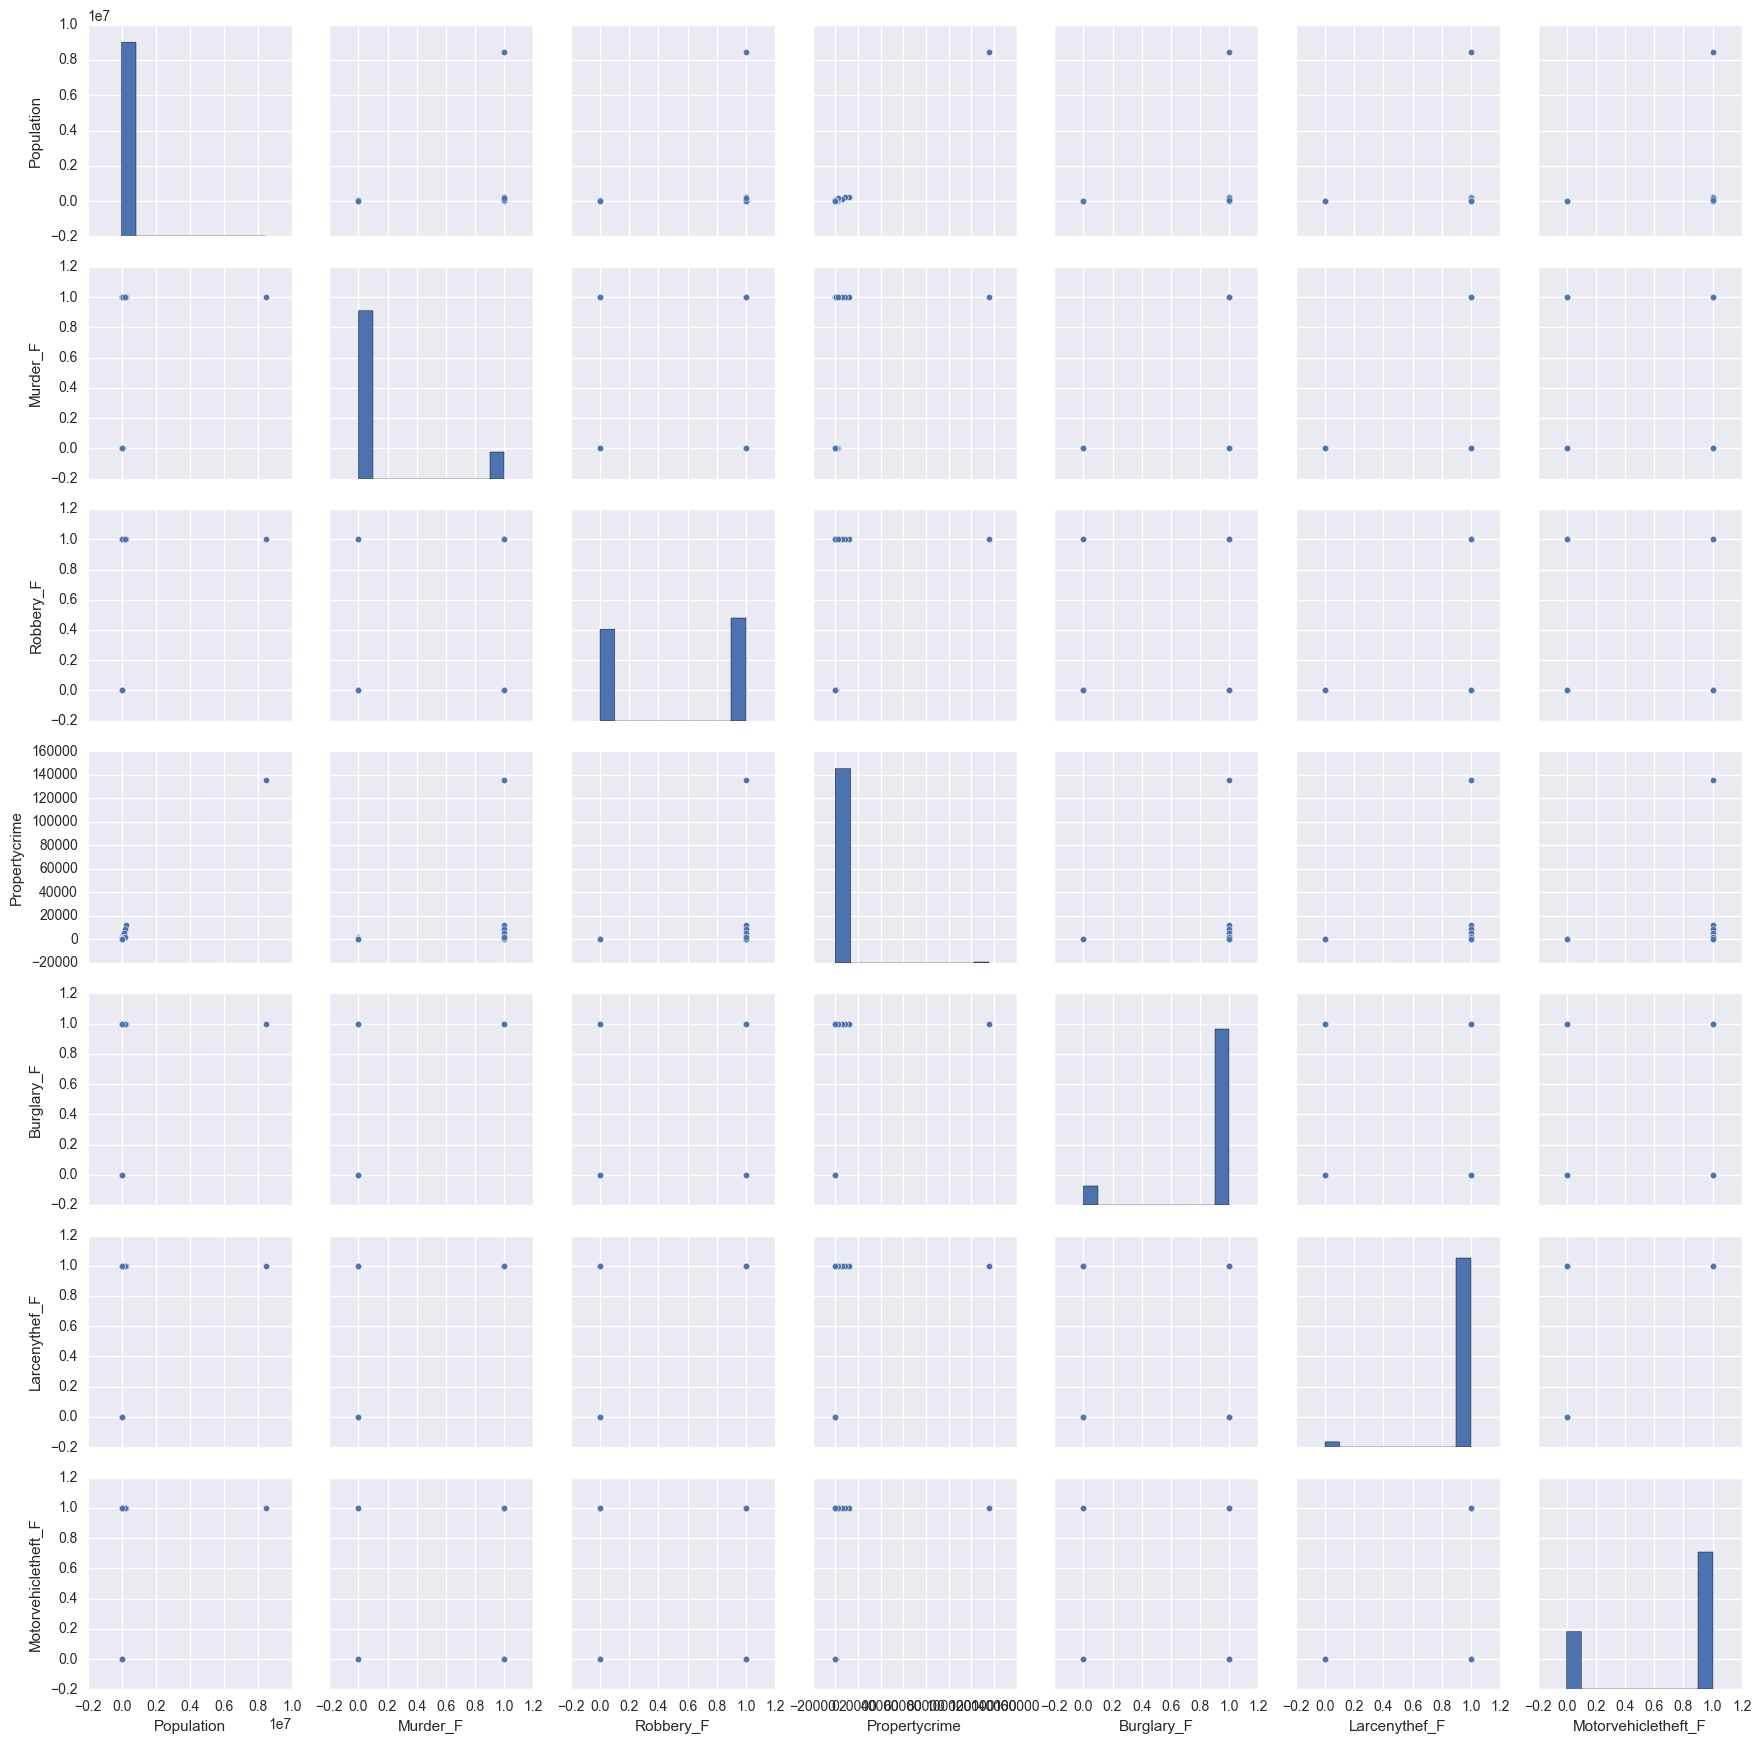

In [25]:
_ = sns.pairplot(data_new1.dropna())

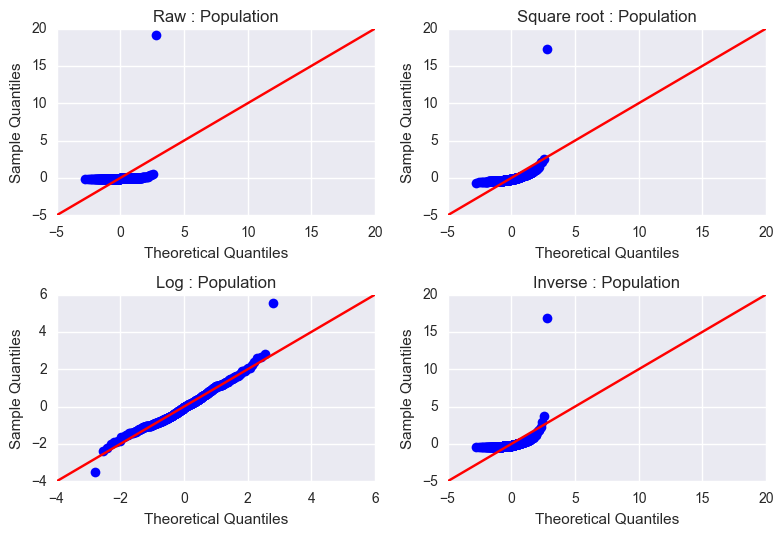

In [26]:
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(data_new1.Population, line='45', fit=True, ax=ax)
ax.set_title('Raw : Population')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(data_new1.Population), line='45', fit=True, ax=ax)
ax.set_title('Square root : Population')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(np.log(data_new1.Population), line='45', fit=True, ax=ax)
ax.set_title('Log : Population')

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(1/data_new1.Population, line='45', fit=True, ax=ax)
ax.set_title('Inverse : Population')
plt.tight_layout();

Now let us see this for the other features

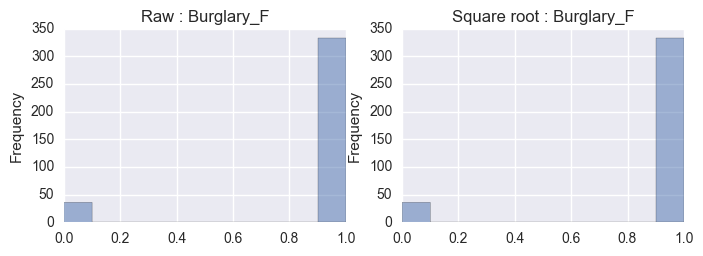

In [27]:
# Burglary
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)

data_new1['Burglary_F'].plot.hist(alpha=0.5)
ax.set_title('Raw : Burglary_F')

ax = fig.add_subplot(2, 2, 2)

ax.set_title('Square root : Burglary_F')
np.sqrt(data_new1['Burglary_F']).plot.hist(alpha=0.5);

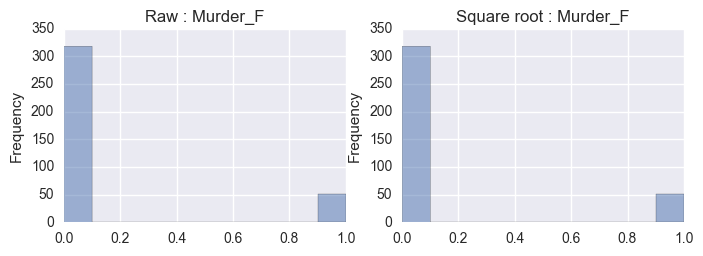

In [28]:
# Murder
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)

data_new1['Murder_F'].plot.hist(alpha=0.5)
ax.set_title('Raw : Murder_F')

ax = fig.add_subplot(2, 2, 2)

ax.set_title('Square root : Murder_F')
np.sqrt(data_new1['Murder_F']).plot.hist(alpha=0.5);

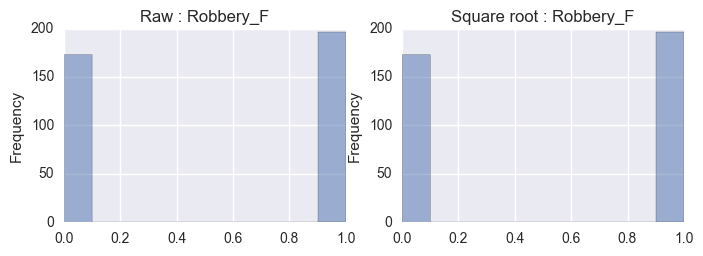

In [29]:
# Robbery
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)

data_new1['Robbery_F'].plot.hist(alpha=0.5)
ax.set_title('Raw : Robbery_F')

ax = fig.add_subplot(2, 2, 2)

ax.set_title('Square root : Robbery_F')
np.sqrt(data_new1['Robbery_F']).plot.hist(alpha=0.5);

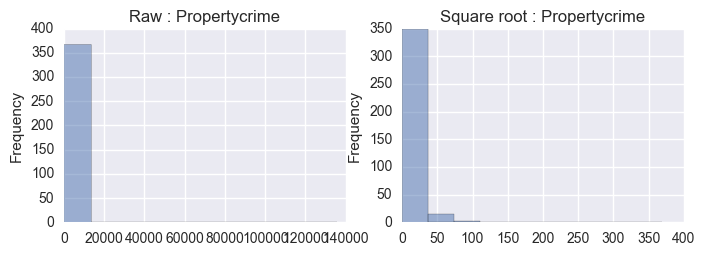

In [30]:
# Property crime
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)

data_new1['Propertycrime'].plot.hist(alpha=0.5)
ax.set_title('Raw : Propertycrime')

ax = fig.add_subplot(2, 2, 2)

ax.set_title('Square root : Propertycrime')
np.sqrt(data_new1['Propertycrime']).plot.hist(alpha=0.5);

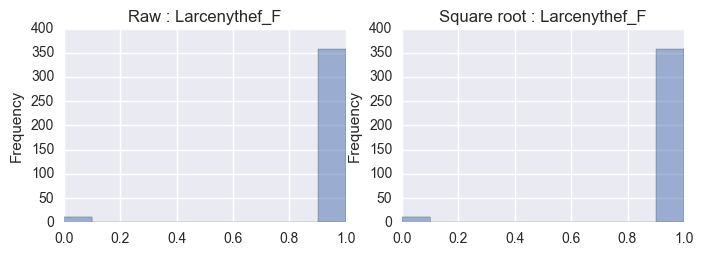

In [31]:
# Larcenythef
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)

data_new1['Larcenythef_F'].plot.hist(alpha=0.5)
ax.set_title('Raw : Larcenythef_F')

ax = fig.add_subplot(2, 2, 2)

ax.set_title('Square root : Larcenythef_F')
np.sqrt(data_new1['Larcenythef_F']).plot.hist(alpha=0.5);

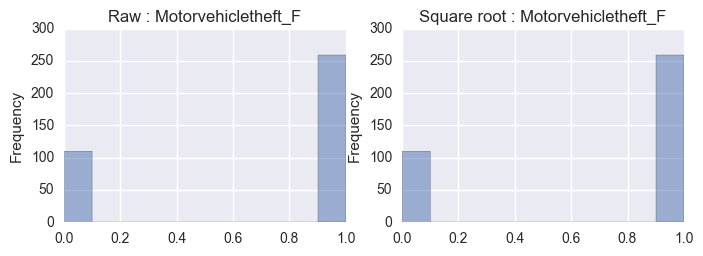

In [32]:
# Motorvehicletheft
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)

data_new1['Motorvehicletheft_F'].plot.hist(alpha=0.5)
ax.set_title('Raw : Motorvehicletheft_F')

ax = fig.add_subplot(2, 2, 2)

ax.set_title('Square root : Motorvehicletheft_F')
np.sqrt(data_new1['Motorvehicletheft_F']).plot.hist(alpha=0.5);

In [33]:
# Adding the log of the raw Population data points into data frame.
data_new1['Population_l'] = np.log(data_new1.Population)
data_new1['Burglary_sqrt'] = np.sqrt(data_new1.Burglary_F)
data_new1['Murder_sqrt'] = np.sqrt(data_new1.Murder_F)
data_new1['Robbery_sqrt'] = np.sqrt(data_new1.Robbery_F)
data_new1['Propertycrime_sqrt'] = np.sqrt(data_new1.Propertycrime)
data_new1['Larcenythef_sqrt'] = np.sqrt(data_new1.Larcenythef_F)
data_new1['Motorvehicletheft_sqrt'] = np.sqrt(data_new1.Motorvehicletheft_F)

In [34]:
data_new1.columns

Index(['City', 'Population', 'Murder_F', 'Robbery_F', 'Propertycrime',
       'Burglary_F', 'Larcenythef_F', 'Motorvehicletheft_F', 'Population_l',
       'Burglary_sqrt', 'Murder_sqrt', 'Robbery_sqrt', 'Propertycrime_sqrt',
       'Larcenythef_sqrt', 'Motorvehicletheft_sqrt'],
      dtype='object')

In [35]:
trans_data_new = data_new1[['City',
                       'Population_l',
                       'Burglary_sqrt',
                       'Murder_sqrt',
                       'Robbery_sqrt', 
                       'Propertycrime_sqrt',
                       'Larcenythef_sqrt', 
                       'Motorvehicletheft_sqrt']]

In [36]:
trans_data_new.head(2)

,City,Population_l,Burglary_sqrt,Murder_sqrt,Robbery_sqrt,Propertycrime_sqrt,Larcenythef_sqrt,Motorvehicletheft_sqrt
4,Adams Village,7.523481,1.0,0.0,0.0,3.316625,1.0,0.0
5,Addison Town and Village,7.850883,1.0,0.0,1.0,7.000000,1.0,1.0


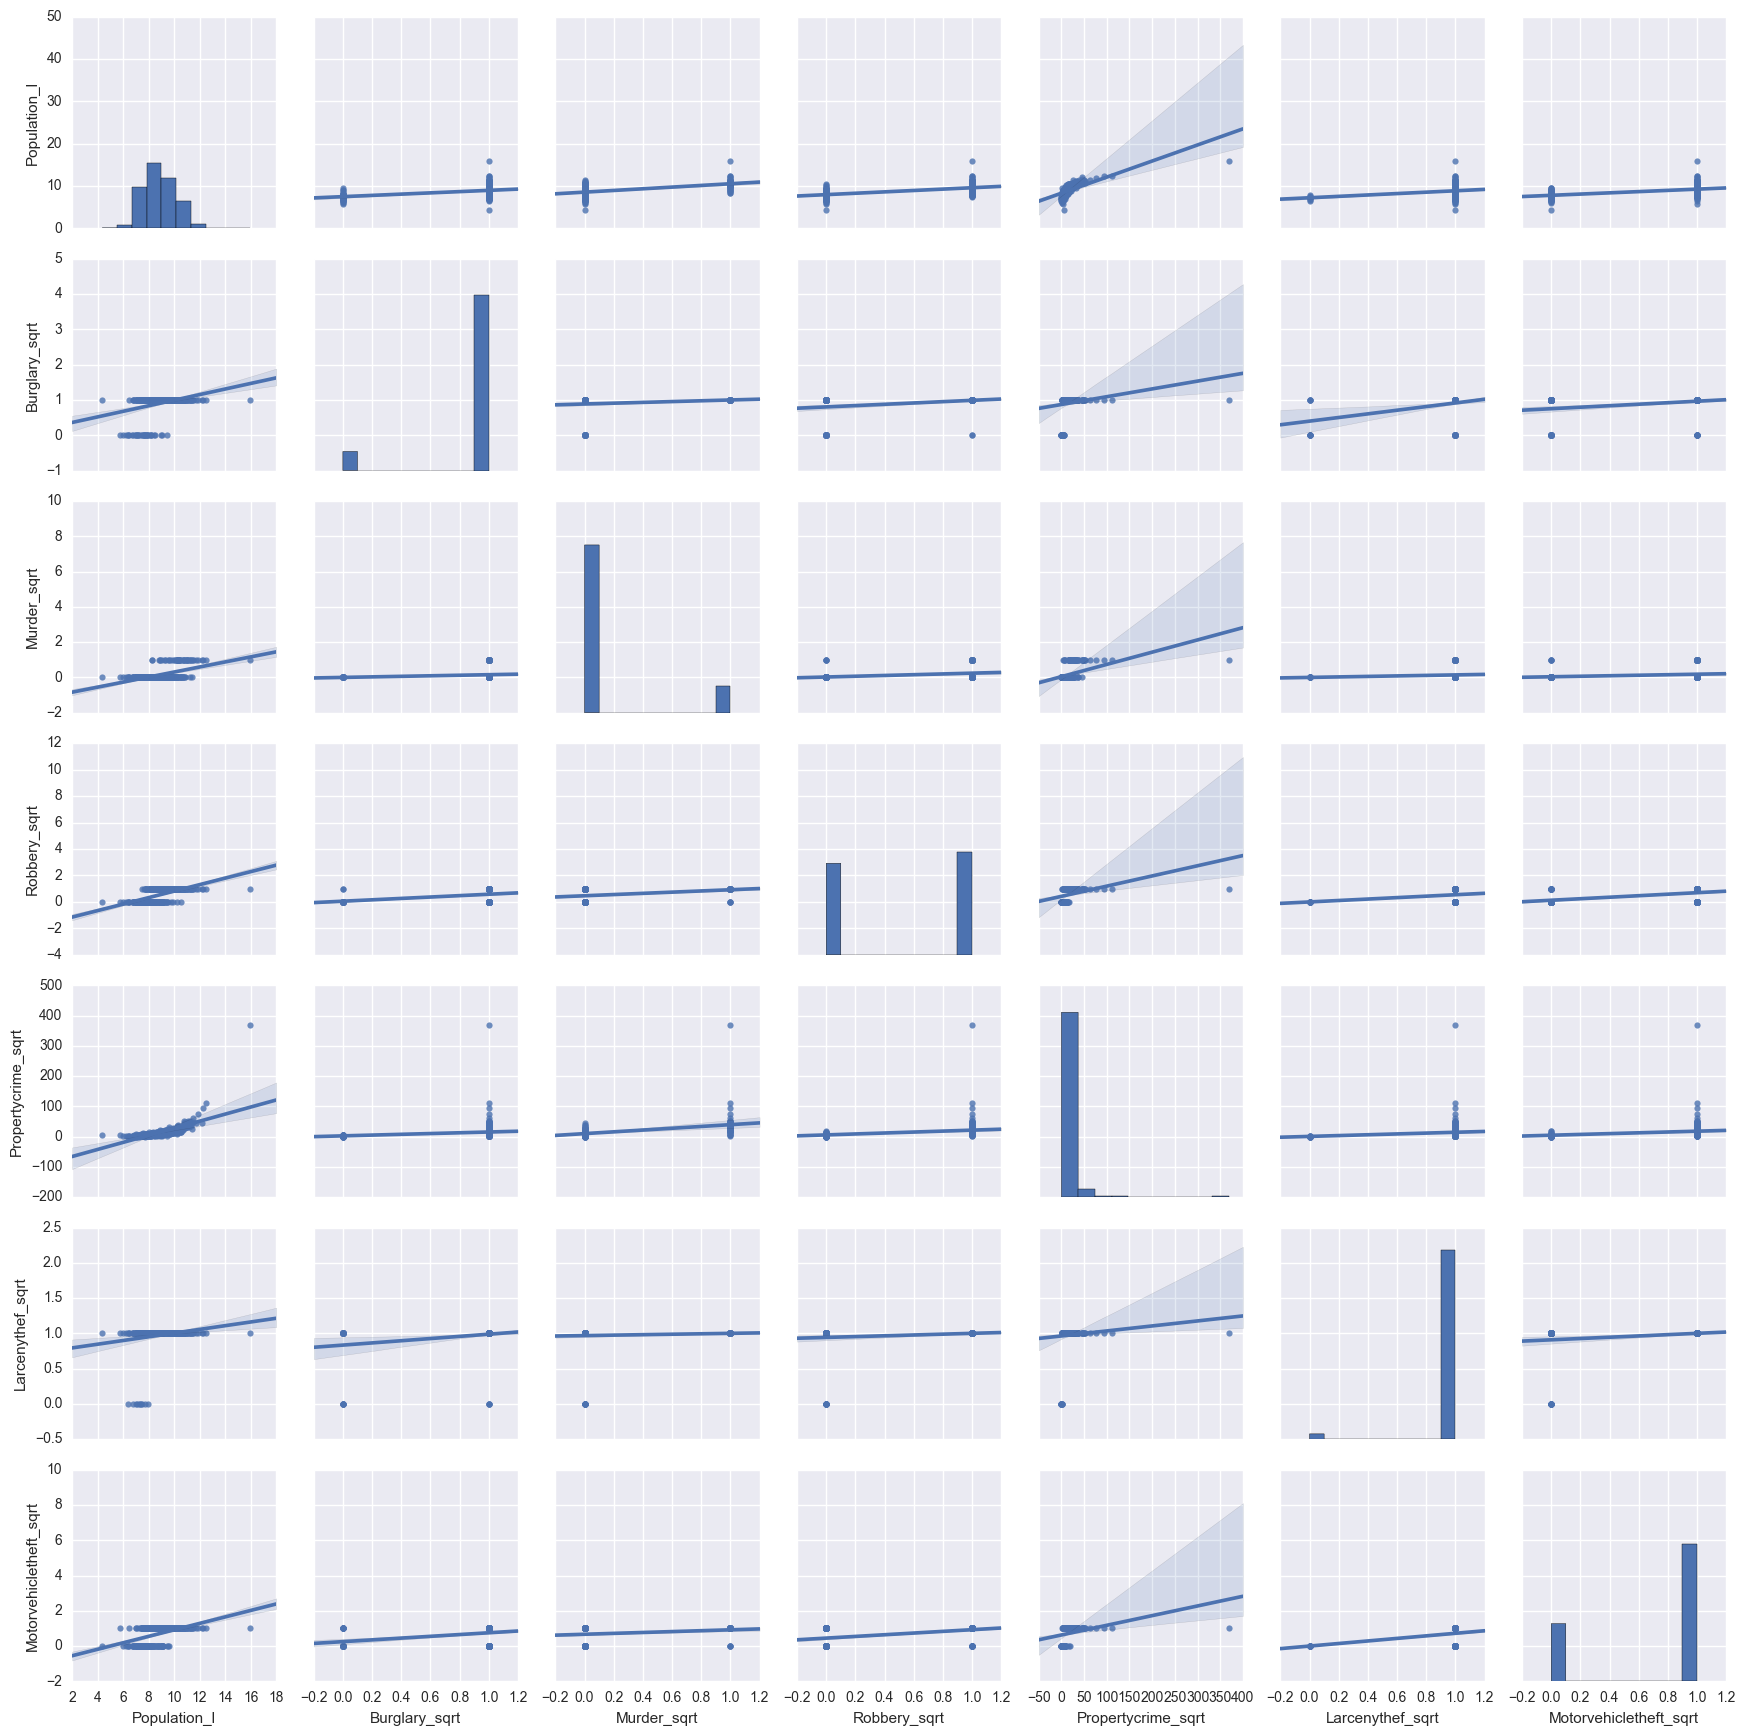

In [37]:
_ = sns.pairplot(trans_data_new.dropna(), kind='reg')

In [38]:
trans_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 4 to 372
Data columns (total 8 columns):
City                      369 non-null object
Population_l              369 non-null float64
Burglary_sqrt             369 non-null float64
Murder_sqrt               369 non-null float64
Robbery_sqrt              369 non-null float64
Propertycrime_sqrt        368 non-null float64
Larcenythef_sqrt          369 non-null float64
Motorvehicletheft_sqrt    369 non-null float64
dtypes: float64(7), object(1)
memory usage: 25.9+ KB


Let us apply train test to the data frame of 2014

In [39]:
from sklearn.cross_validation import train_test_split

In [40]:
X = trans_data_new[['Population_l','Burglary_sqrt','Murder_sqrt','Robbery_sqrt']]
y = trans_data_new.Propertycrime_sqrt.values

print(type(X))
print(X.shape)
print(y.shape)
print(X.info())
print(type(y))

<class 'pandas.core.frame.DataFrame'>
(369, 4)
(369,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 4 to 372
Data columns (total 4 columns):
Population_l     369 non-null float64
Burglary_sqrt    369 non-null float64
Murder_sqrt      369 non-null float64
Robbery_sqrt     369 non-null float64
dtypes: float64(4)
memory usage: 14.4 KB
None
<class 'numpy.ndarray'>


In [41]:
 # Try to do the regression model here
 X = trans_data_new[[
                       'Population_l',
                       'Burglary_sqrt',
                       'Murder_sqrt',
                       'Robbery_sqrt', 
                       'Larcenythef_sqrt', 
                       'Motorvehicletheft_sqrt']].values
y = trans_data_new['Propertycrime_sqrt'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

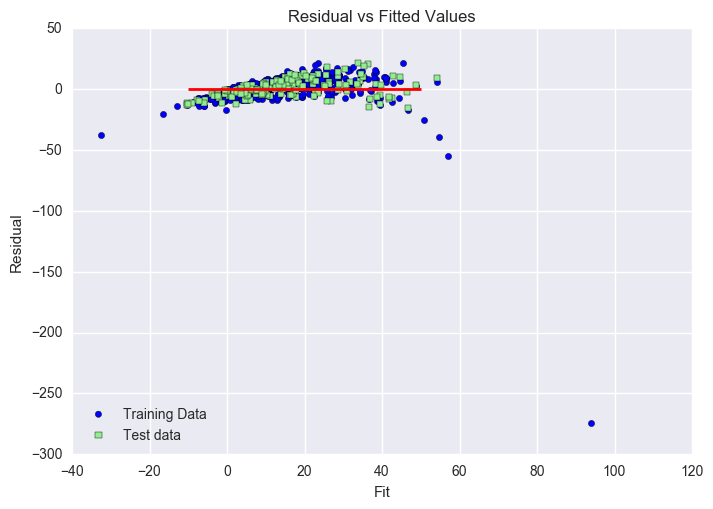

In [57]:
# Visualize
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlabel('Fit')
plt.ylabel('Residual')
plt.legend(loc='lower left')
plt.title('Residual vs Fitted Values');


We see big outlier here. Let us use more datapoints and try the same model.In order to do that we will concat the cleaned and transformed data from 2013 and see what we get.

In [44]:
# import data
data1 = pd.read_excel("./trans_data13.xls")

In [45]:
data1.shape

(344, 8)

In our model of 2013 we have not used city so let us remove that column.

In [46]:
del data1['City']
del trans_data_new['City']

joint_data = pd.concat([data1, trans_data_new], ignore_index=True)

In [47]:
joint_data.describe()

C:\Users\NutanMandale\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Population_l,Burglary_sqrt,Murder_sqrt,Robbery_sqrt,Propertycrime_sqrt,Larcenythef_sqrt,Motorvehicletheft_sqrt
count,713.000000,713.000000,713.000000,713.000000,712.000000,713.000000,713.000000
mean,8.869567,0.920056,0.134642,0.562412,13.739657,0.974755,0.715288
std,1.224201,0.271397,0.341581,0.496438,17.884924,0.156980,0.451594
min,4.369448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.917172,1.000000,0.000000,0.000000,NaN,1.000000,0.000000
50%,8.823795,1.000000,0.000000,1.000000,NaN,1.000000,1.000000
75%,9.698429,1.000000,0.000000,1.000000,NaN,1.000000,1.000000
max,15.952506,1.000000,1.000000,1.000000,368.438597,1.000000,1.000000


In [48]:
joint_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 7 columns):
Population_l              713 non-null float64
Burglary_sqrt             713 non-null float64
Murder_sqrt               713 non-null float64
Robbery_sqrt              713 non-null float64
Propertycrime_sqrt        712 non-null float64
Larcenythef_sqrt          713 non-null float64
Motorvehicletheft_sqrt    713 non-null float64
dtypes: float64(7)
memory usage: 39.1 KB


In [49]:
joint_data = joint_data.dropna()

In [50]:
joint_data.shape

(712, 7)

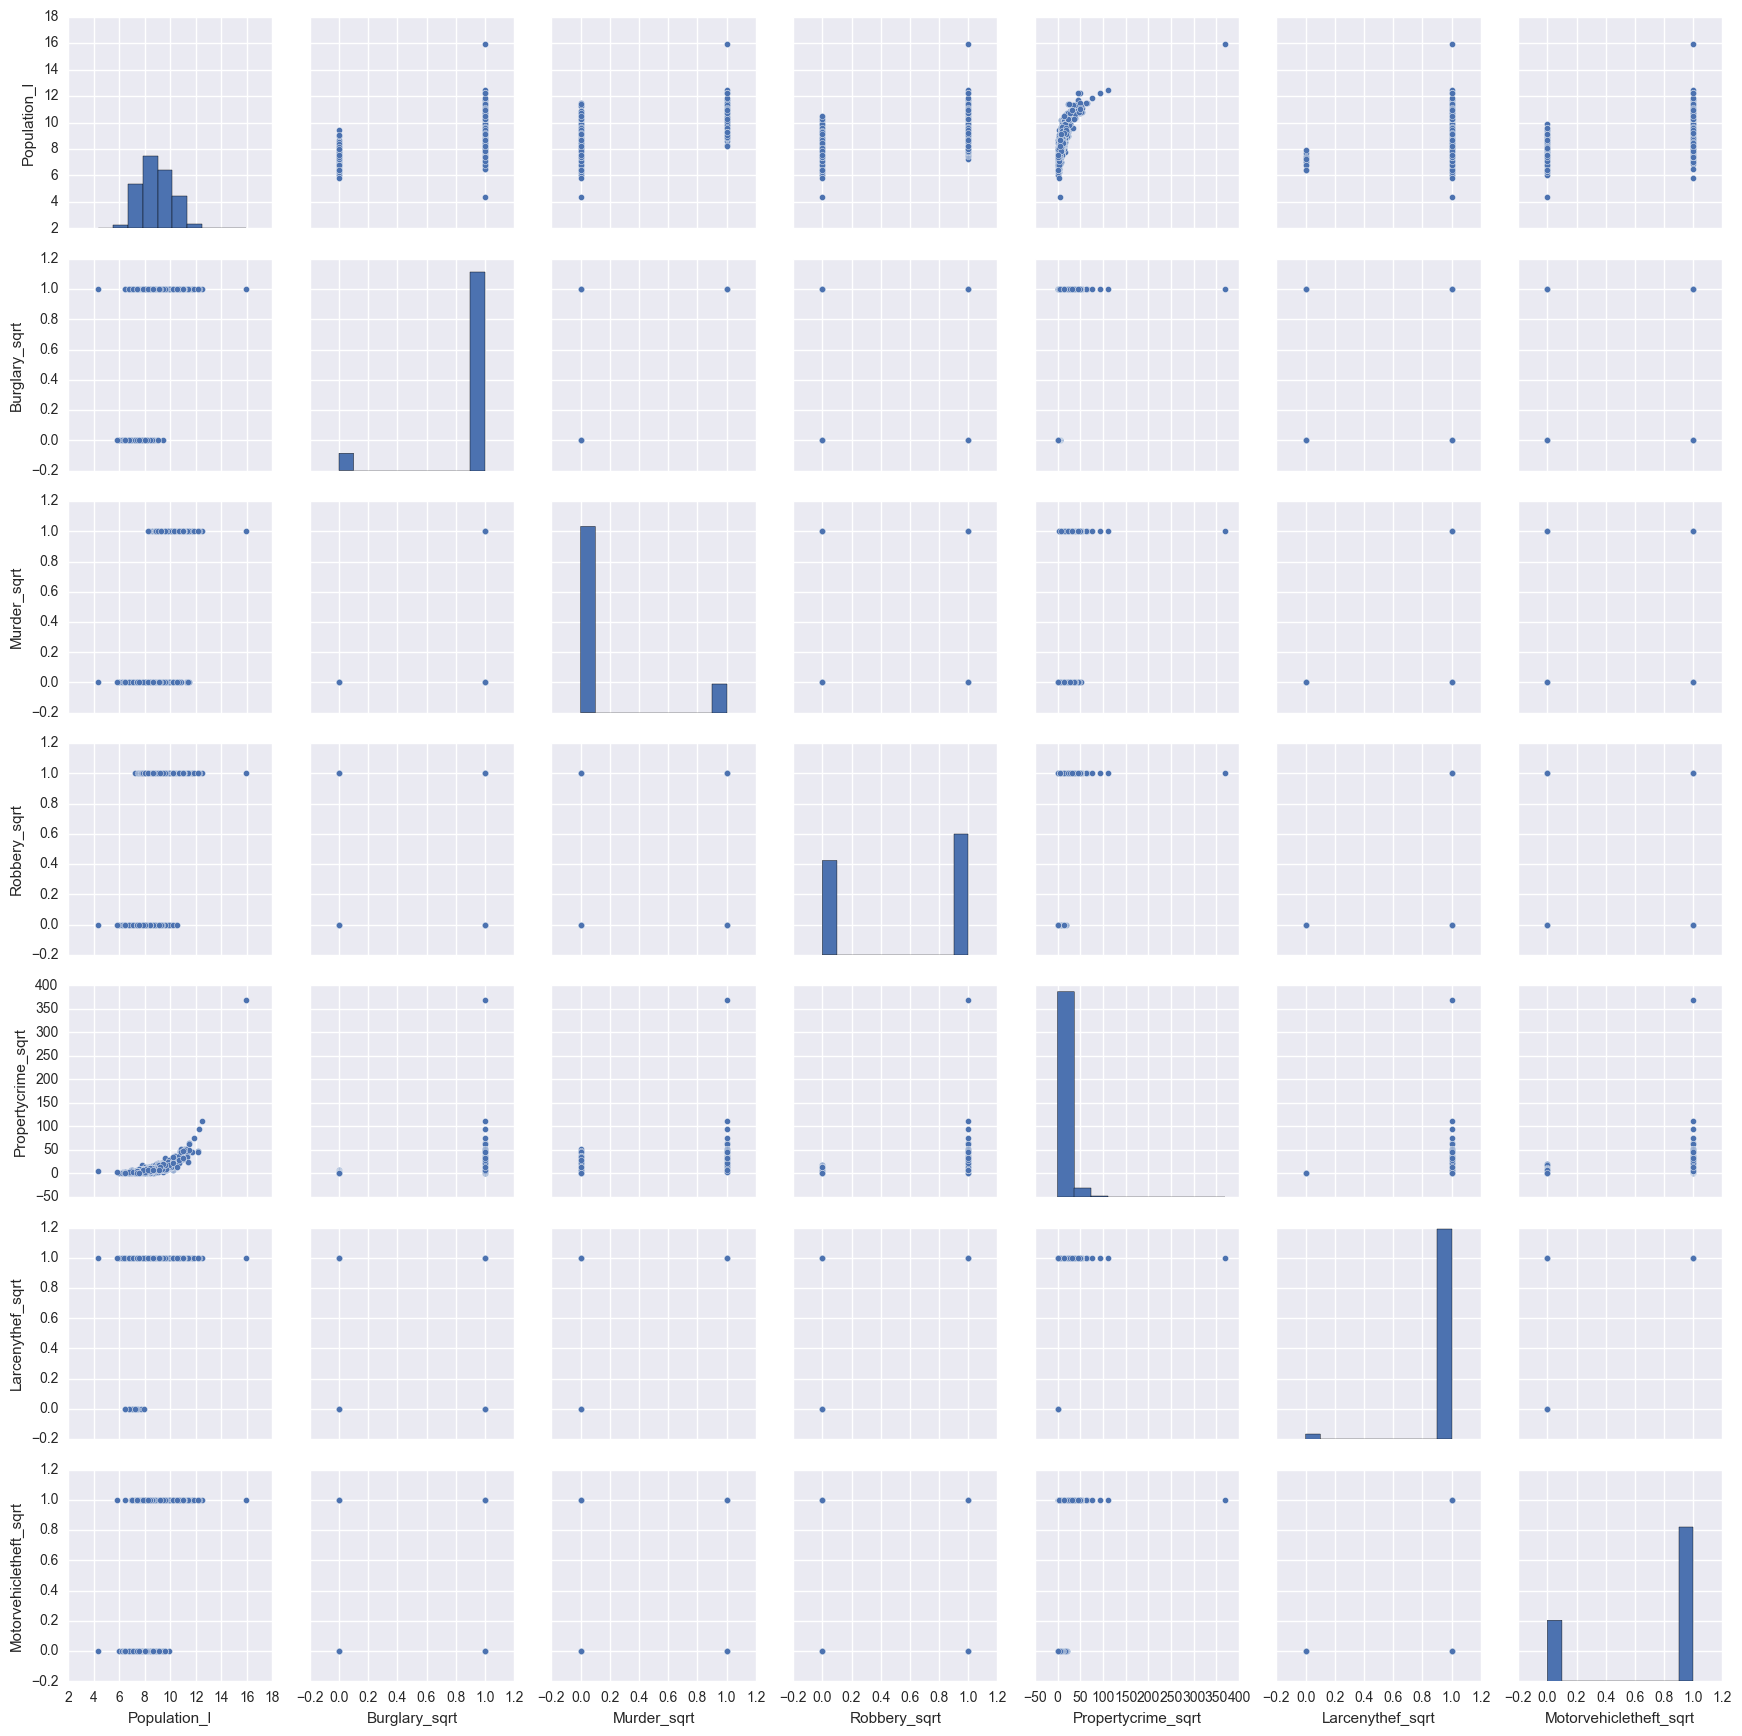

In [51]:
_ = sns.pairplot(joint_data)

In [52]:
from sklearn.cross_validation import train_test_split

In [53]:
X = joint_data[['Population_l','Burglary_sqrt','Murder_sqrt','Robbery_sqrt','Larcenythef_sqrt','Motorvehicletheft_sqrt']]
y = joint_data[['Propertycrime_sqrt']].values.reshape(-1, 1)

print(X.shape)
print(y.shape)

(712, 6)
(712, 1)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

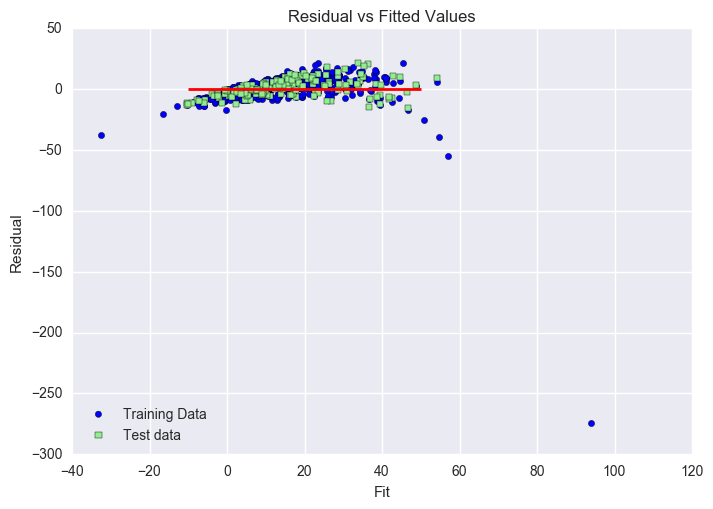

In [56]:
# Visualize
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlabel('Fit')
plt.ylabel('Residual')
plt.legend(loc='lower left')
plt.title('Residual vs Fitted Values');


We see an outlier in training data.If we consider those outliers in the training data  there exist a pattern (a parabolic shape) in this plot. It is signs of non-linearity in the data. It means that the model doesn’t capture non-linear effects.

In [ ]:
On the otherhand if we neglect those outliars we dont get any evident pattern.